# Sequential Monte Carlo-based mobility tracking in cellular networks

In [1]:
include("motion_model.jl")
using MAT 
using DataFrames

## A Hidden Markov Model for Mobility Tracking
### Problem 1

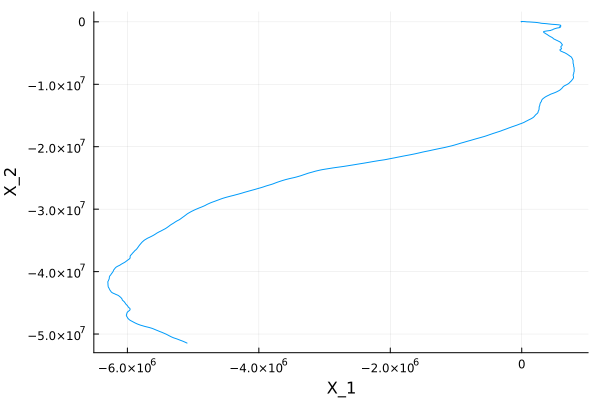

In [40]:
Random.seed!(80085)
simulations = simulate(1, 100000)
plot(simulations[1, :, 1], simulations[1, :, 4],xlabel="X_1", ylabel="X_2", legend=false)
# savefig("figures/motion_model.pdf")

## Mobility Tracking Using SMC Methods
### Problem 3

Notice how the algorithm breaks down because $1 / \omega \rightarrow \infty$

In [2]:
y = matread("RSSI-measurements.mat")["Y"] # SMatrix bad for large arrays
station_positions = SMatrix{2, 6}(matread("stations.mat")["pos_vec"])
n_particles = 100000
stop_time = size(y, 2) # number of time steps
estimated_movement, ω = sis(y, n_particles, stop_time, station_positions,[(x, t, ω) -> x], [6],1.5^2, true)
estimated_movement = estimated_movement[1]

u better work sis <3  13%|█████                          |  ETA: 0:00:49

501×6 Matrix{Float64}:
  0.587567   0.00755574  -0.00437191    0.0171097  -0.00168105   0.0074768
  1.00758    0.00286315  -0.004381      0.975752    0.0151806    0.00568143
 -0.947765  -0.036834    -0.00461714    0.28284    -0.00973071   0.00438346
 -0.668612  -0.0305938   -0.00323869    0.200507   -0.0130945    0.00340664
  2.05677    0.135687     0.00404907    1.06303     0.108129     0.00568996
  3.14812    0.237409     0.00463159    2.74786     0.417615     0.0102315
  3.13236    0.23456      0.000525248   5.35372     0.960689     0.0120172
  4.8828     0.473149     0.00319171    6.04168     1.054        0.00540761
  3.77532    0.264549     0.00141691    3.45649     0.322704    -0.00110863
  2.14877   -0.0440234   -0.000832905   4.66312     0.5737      -0.000804047
 -1.43429   -0.70602     -0.00268113    8.98783     1.55039      0.00399102
 -7.47229   -1.79788     -0.00599582    9.6825      1.55744      0.00298715
 -9.20098   -1.99667     -0.00150451   10.4926      1.58713      0.

In [ ]:
plot(estimated_movement[:, 1], estimated_movement[:, 4], xlabel="X_1", ylabel="X_2", legend=false)
# savefig("figures/estimated_movement.pdf")

"c:\\Users\\toven\\Documents\\tove-code\\sf2955_ha-1\\figures\\estimated_movement.pdf"

In [4]:
println(size(ω))
println(minimum(ω[:, 1]))
println(maximum(ω[:, 1]))

(100000, 501)
0.00018091590176679277
0.0002451198484903021


┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194


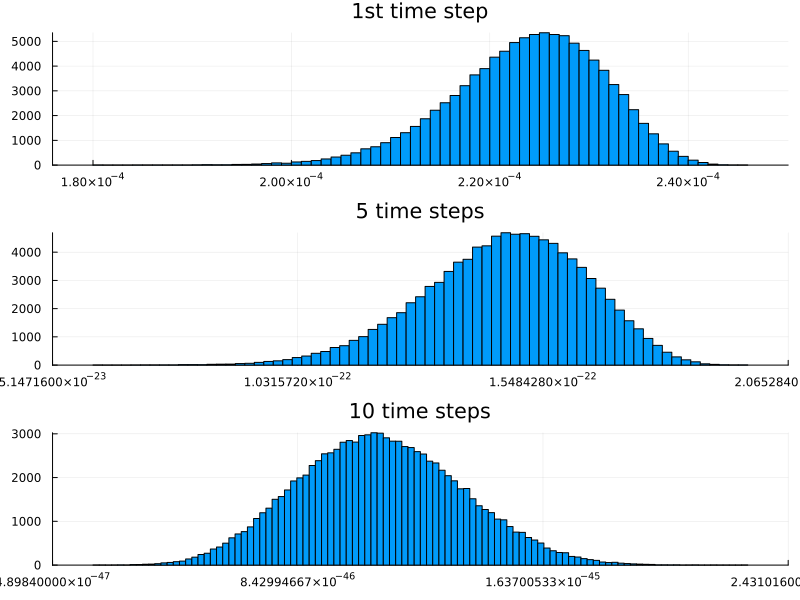

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194


In [28]:
p1 = histogram(ω[:, 1], bins = 100, title="1st time step", legend=false)
p2 = histogram(ω[:, 5], bins=100, title="5 time steps", legend=false)
p3 = histogram(ω[:, 10], bins=100, title="10 time steps", legend=false)
plot(p1, p2, p3, layout=(3,1), size=(800,600))
#savefig("figures/weights_histogram.pdf")

### Effective Sample Size

In [30]:
function CV_N(weights)
    N = length(weights)
    Ω = sum(weights)
    return sqrt(N * sum((weights ./ Ω .- 1 / N).^2))
end

function efficient_sample_size(weights)
    N = length(weights)
    
    return N / (1 + CV_N(weights)^2)
end

efficient_sample_size (generic function with 1 method)

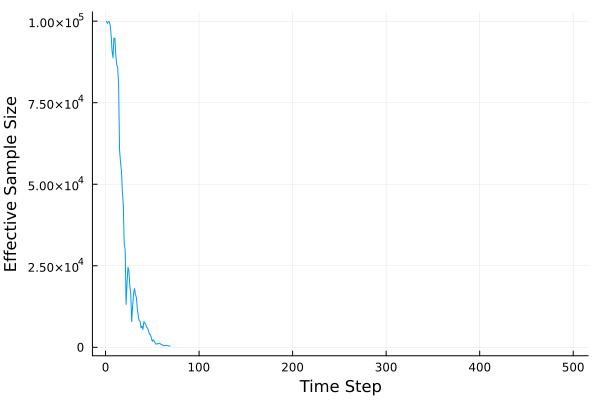

In [41]:
efs_values = zeros(stop_time)
for i in 1:stop_time
    efs_values[i] = efficient_sample_size(ω[:, i])
end
plot(efs_values, xlabel="Time Step", ylabel="Effective Sample Size", legend=false)
# savefig("figures/efs.pdf")

### Problem 4

In [36]:
n_particles = 200000
stop_time = size(y, 2) # number of time steps
estimated_movement_sisr = sisr(y, n_particles, stop_time, station_positions, [(x, t, ω) -> x],[6], 1.5^2)[1]

u better work sisr <3 100%|██████████████████████████████| Time: 0:00:58


501×6 Matrix{Float64}:
   -0.00260312   -0.00627005   0.00562499   …   0.0051349    0.00652828
    0.31231      -0.00393719   0.00288368       0.0259665    0.00276821
   -1.74175      -0.0383265    8.79421e-5      -0.00577529  -0.00428321
   -1.45948      -0.0242424    0.00236309      -0.00699062  -0.00292094
    1.27031       0.104273     0.00747504       0.066623    -0.000908128
    2.38225       0.184247     0.00776163   …   0.250596     0.00587267
    2.32071       0.176951     0.00163281       0.571008     0.0107885
    3.87953       0.304778     0.00269771       0.617252     0.00787708
    2.83952       0.181295    -0.00155825       0.230159     0.00012316
    1.6409        0.040481    -0.001233         0.34797      0.00159785
   -1.07271      -0.267135    -0.0014098    …   0.795523     0.00368607
   -5.24285      -0.744522    -0.00565959       0.783703     0.00140047
   -6.23565      -0.812638    -0.00402284       0.785936     0.00143147
    ⋮                                    

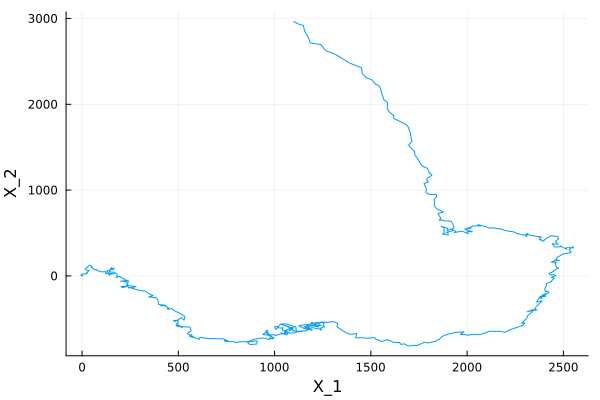

In [42]:
plot(estimated_movement_sisr[:, 1], estimated_movement_sisr[:, 4], xlabel="X_1", ylabel="X_2", legend=false)
# savefig("figures/estimated_movement_sisr.pdf")

## Problem 5

Grid searching <3 100%|██████████████████████████████████| Time: 0:04:27


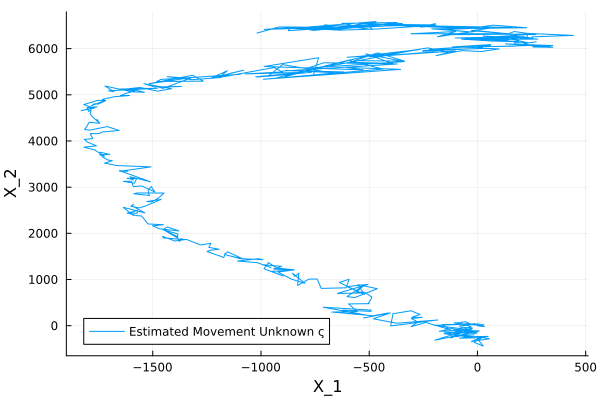

In [43]:
y_unknown_ς = matread("RSSI-measurements-unknown-sigma.mat")["Y"] # SMatrix bad for large arrays
ς_grid = 3 .^ range(-1, 1, length=100)
n_particles = 10000
stop_time = size(y, 2) # number of time steps

ς_estimate, estimated_movement_unknown_ς = ς_grid_search(y_unknown_ς, n_particles, stop_time, station_positions, ς_grid)
plot(estimated_movement_unknown_ς[:, 1], estimated_movement_unknown_ς[:, 4], xlabel="X_1", ylabel="X_2", label="Estimated Movement Unknown ς")


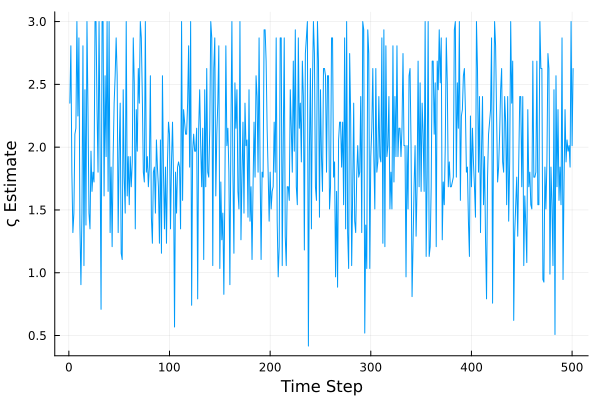

In [50]:
plot(ς_estimate, xlabel="Time Step", ylabel="ς Estimate", legend=false)
#savefig("figures/ς_estimate.pdf")